In [1]:
%load_ext autoreload
%autoreload 2

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.patches
import matplotlib.lines
import matplotlib.colors
matplotlib.rcParams["figure.dpi"] = 150

import numpy as np

import sys
sys.path.append("..")
from encoder_learning_benchmarks.common import numerical_jacobian
from encoder_learning_benchmarks.positive_definite_matrix import PositiveDefiniteMatrix

np.set_printoptions(precision=4, suppress=True)

In [58]:
A = PositiveDefiniteMatrix(3)

In [59]:
theta = (0.4, 0.4, 0, 1.2, 1.1, 1.2)
A(theta)

array([[[2.2255, 1.7902, 1.7902],
        [1.7902, 3.6655, 3.081 ],
        [1.7902, 3.081 , 3.65  ]]])

In [60]:
numerical_jacobian(A, theta)

array([[[[4.4511, 0.    , 0.    , 0.    , 0.    , 0.    ],
         [1.7902, 0.    , 0.    , 1.4918, 0.    , 0.    ],
         [1.7902, 0.    , 0.    , 0.    , 0.    , 1.4918]],

        [[1.7902, 0.    , 0.    , 1.4918, 0.    , 0.    ],
         [0.    , 4.4511, 0.    , 2.4   , 0.    , 0.    ],
         [0.    , 1.641 , 0.    , 1.2   , 1.4918, 1.2   ]],

        [[1.7902, 0.    , 0.    , 0.    , 0.    , 1.4918],
         [0.    , 1.641 , 0.    , 1.2   , 1.4918, 1.2   ],
         [0.    , 0.    , 2.    , 0.    , 2.2   , 2.4   ]]]])

In [61]:
A.jacobian(theta)

array([[[[4.4511, 0.    , 0.    , 0.    , 0.    , 0.    ],
         [1.7902, 0.    , 0.    , 1.4918, 0.    , 0.    ],
         [1.7902, 0.    , 0.    , 0.    , 0.    , 1.4918]],

        [[1.7902, 0.    , 0.    , 1.4918, 0.    , 0.    ],
         [0.    , 4.4511, 0.    , 2.4   , 0.    , 0.    ],
         [0.    , 1.641 , 0.    , 1.2   , 1.4918, 1.2   ]],

        [[1.7902, 0.    , 0.    , 0.    , 0.    , 1.4918],
         [0.    , 1.641 , 0.    , 1.2   , 1.4918, 1.2   ],
         [0.    , 0.    , 2.    , 0.    , 2.2   , 2.4   ]]]])

In [62]:
numerical_jacobian(A.inverse, theta)

array([[[[-1.5694, -0.3308, -0.0893,  0.2757, -0.2278,  0.2832],
         [ 0.2057,  1.0044, -0.3116, -0.6656, -0.256 ,  0.4943],
         [ 0.2113, -0.5931,  0.4225,  0.4943,  0.5392, -0.6703]],

        [[ 0.2057,  1.0044, -0.3116, -0.6656, -0.256 ,  0.4943],
         [ 0.    , -1.986 , -1.0874,  0.    ,  0.9885,  0.    ],
         [ 0.    ,  0.7374,  1.4747,  0.    , -0.6703,  0.    ]],

        [[ 0.2113, -0.5931,  0.4225,  0.4943,  0.5392, -0.6703],
         [ 0.    ,  0.7374,  1.4747,  0.    , -0.6703,  0.    ],
         [ 0.    ,  0.    , -2.    ,  0.    ,  0.    ,  0.    ]]]])

In [63]:
A.inverse_jacobian(theta)

array([[[[-1.5694, -0.3308, -0.0893,  0.2757, -0.2278,  0.2832],
         [ 0.2057,  1.0044, -0.3116, -0.6656, -0.256 ,  0.4943],
         [ 0.2113, -0.5931,  0.4225,  0.4943,  0.5392, -0.6703]],

        [[ 0.2057,  1.0044, -0.3116, -0.6656, -0.256 ,  0.4943],
         [ 0.    , -1.986 , -1.0874, -0.    ,  0.9885,  0.    ],
         [ 0.    ,  0.7374,  1.4747,  0.    , -0.6703, -0.    ]],

        [[ 0.2113, -0.5931,  0.4225,  0.4943,  0.5392, -0.6703],
         [-0.    ,  0.7374,  1.4747,  0.    , -0.6703, -0.    ],
         [-0.    , -0.    , -2.    , -0.    ,  0.    ,  0.    ]]]])

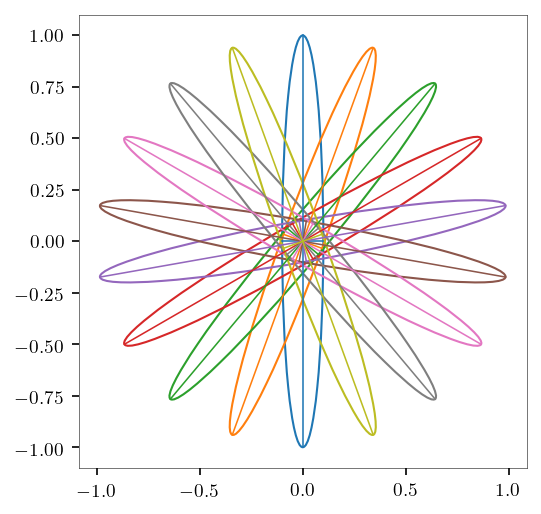

In [83]:
fig, ax = plt.subplots()
for i, alpha in enumerate(np.linspace(0, np.pi, 10)[:-1]):
    psd = PositiveDefiniteMatrix(2)
    theta = psd.params_from_givens([0.1, 1.0], [alpha])[0]
    plot_gaussian(ax, mu=[0.0, 0.0], theta=theta, color=cm.get_cmap('tab10')(i / 10))
ax.set_aspect(1)